In [1]:
import pandas as pd 
import numpy as np 

train_set  = pd.read_csv("../data/train.csv")

print(train_set.head(10))


   year  month  day  hour  minute      lat      lon  intensity  size  \
0  2004      1   19    10      30 -13.6126  48.2281        468  1422   
1  2004      1   19    10      45 -13.7039  48.2598        488  1881   
2  2004      1   19    11       0 -13.7953  48.2918        424  1746   
3  2004      1   19    11      15 -14.2190  48.3387        485  4167   
4  2004      1   19    11      30 -13.2851  49.2745        155   207   
5  2004      1   19    11      45 -13.1702  49.4486        235  1638   
6  2004      1   19    12       0 -13.6081  49.0155        460  8469   
7  2004      1   19    12      15 -13.6064  48.9618        442  9900   
8  2004      1   19    12      30 -12.6188  49.1001        239  9873   
9  2004      1   19    12      45 -12.5869  49.0363        214  2097   

   distance  Storm_NosyBe_1h  Storm_NosyBe_3h  
0     10.44                0                1  
1     13.34                0                1  
2     16.28                0                1  
3     30.41    

In [2]:
print(train_set.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51077 entries, 0 to 51076
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             51077 non-null  int64  
 1   month            51077 non-null  int64  
 2   day              51077 non-null  int64  
 3   hour             51077 non-null  int64  
 4   minute           51077 non-null  int64  
 5   lat              51077 non-null  float64
 6   lon              51077 non-null  float64
 7   intensity        51077 non-null  int64  
 8   size             51077 non-null  int64  
 9   distance         51077 non-null  float64
 10  Storm_NosyBe_1h  51077 non-null  int64  
 11  Storm_NosyBe_3h  51077 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 4.7 MB
None


In [3]:
print(train_set.describe())



               year         month           day          hour        minute  \
count  51077.000000  51077.000000  51077.000000  51077.000000  51077.000000   
mean    2011.761908      4.760146     15.965444     13.619144     22.507489   
std        4.645697      4.311285      8.710566      5.576324     16.762922   
min     2004.000000      1.000000      1.000000      0.000000      0.000000   
25%     2008.000000      2.000000      8.000000     11.000000     15.000000   
50%     2012.000000      3.000000     16.000000     14.000000     30.000000   
75%     2016.000000     11.000000     24.000000     17.000000     30.000000   
max     2019.000000     12.000000     31.000000     23.000000     45.000000   

                lat           lon     intensity          size      distance  \
count  51077.000000  51077.000000  51077.000000  51077.000000  51077.000000   
mean     -13.630660     48.779610    210.809934   3936.537483     24.690407   
std        0.618119      0.750511     86.580096   5

In [4]:
train_set.columns



Index(['year', 'month', 'day', 'hour', 'minute', 'lat', 'lon', 'intensity',
       'size', 'distance', 'Storm_NosyBe_1h', 'Storm_NosyBe_3h'],
      dtype='object')

In [5]:
data = train_set

In [6]:



data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour', 'minute']])


data.set_index('datetime', inplace=True)

data = data.drop(columns=['year', 'month', 'day', 'hour', 'minute'])

print(data)



                         lat      lon  intensity  size  distance  \
datetime                                                           
2004-01-19 10:30:00 -13.6126  48.2281        468  1422     10.44   
2004-01-19 10:45:00 -13.7039  48.2598        488  1881     13.34   
2004-01-19 11:00:00 -13.7953  48.2918        424  1746     16.28   
2004-01-19 11:15:00 -14.2190  48.3387        485  4167     30.41   
2004-01-19 11:30:00 -13.2851  49.2745        155   207     19.10   
...                      ...      ...        ...   ...       ...   
2019-12-31 22:45:00 -14.0402  47.5013        239   621     32.02   
2019-12-31 23:00:00 -13.9506  47.5212        211   873     29.07   
2019-12-31 23:15:00 -13.8898  47.5006        179   999     27.59   
2019-12-31 23:30:00 -13.8002  47.5209        151   549     24.76   
2019-12-31 23:45:00 -13.7698  47.5104        124  2826     24.08   

                     Storm_NosyBe_1h  Storm_NosyBe_3h  
datetime                                               
200

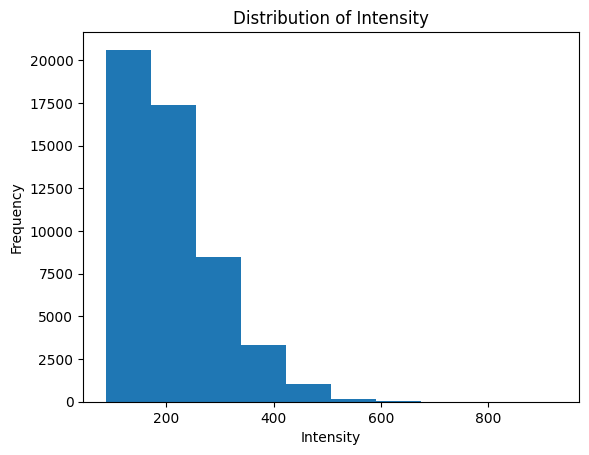

In [7]:
import matplotlib.pyplot as plt

data['intensity'].plot(kind='hist', bins=10, title='Distribution of Intensity')
plt.xlabel('Intensity')
plt.show()



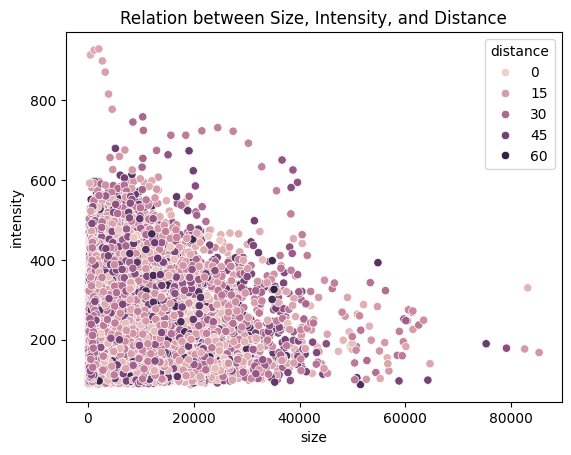

In [8]:
import seaborn as sns

sns.scatterplot(data=data, x='size', y='intensity', hue='distance')
plt.title('Relation between Size, Intensity, and Distance')
plt.show()



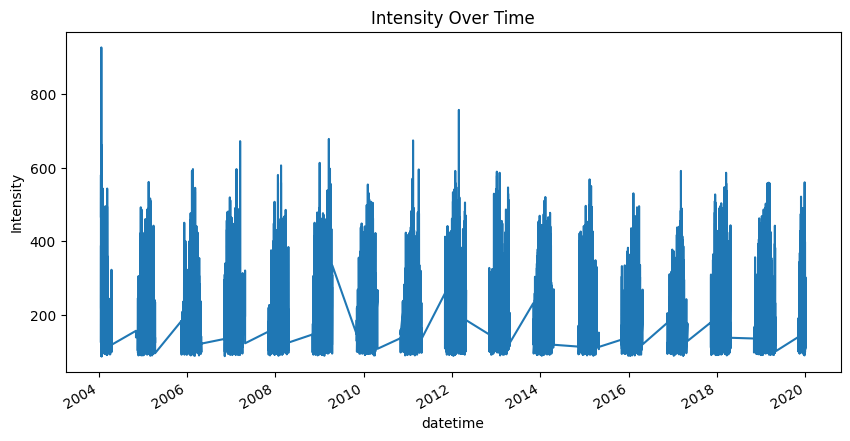

In [9]:
data['intensity'].plot(title='Intensity Over Time', figsize=(10, 5))
plt.ylabel('Intensity')
plt.show()



In [10]:
print(train_set.columns)


Index(['year', 'month', 'day', 'hour', 'minute', 'lat', 'lon', 'intensity',
       'size', 'distance', 'Storm_NosyBe_1h', 'Storm_NosyBe_3h'],
      dtype='object')


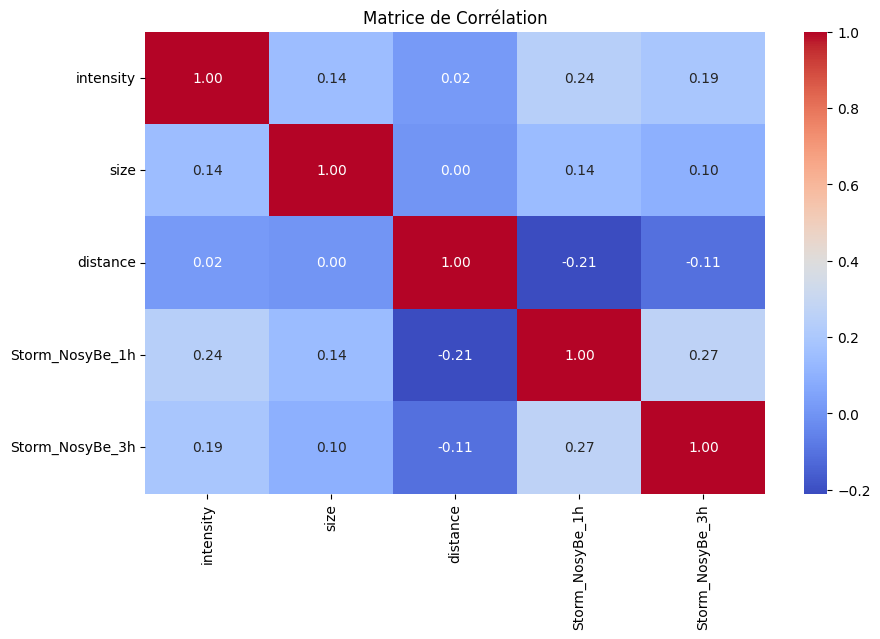

In [11]:
# Étape 1: Créer un index datetime
train_set['datetime'] = pd.to_datetime(train_set[['year', 'month', 'day', 'hour', 'minute']])
train_set.set_index('datetime', inplace=True)

# Étape 2: Supprimer les colonnes temporelles
train_set = train_set.drop(columns=['year', 'month', 'day', 'hour', 'minute',"lon","lat"])

# Étape 3: Calculer la matrice de corrélation
correlation_matrix = train_set.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()




In [12]:
# Normalize : intensity, size, distance 
train_set['intensity_norm'] = (train_set['intensity'] - train_set['intensity'].mean()) / train_set['intensity'].std()
train_set['size_norm'] = (train_set['size'] - train_set['size'].mean()) / train_set['size'].std()
train_set['distance_norm'] = (train_set['distance'] - train_set['distance'].mean()) / train_set['distance'].std()


# train_set = train_set.drop(columns=["intensity","size","distance"])


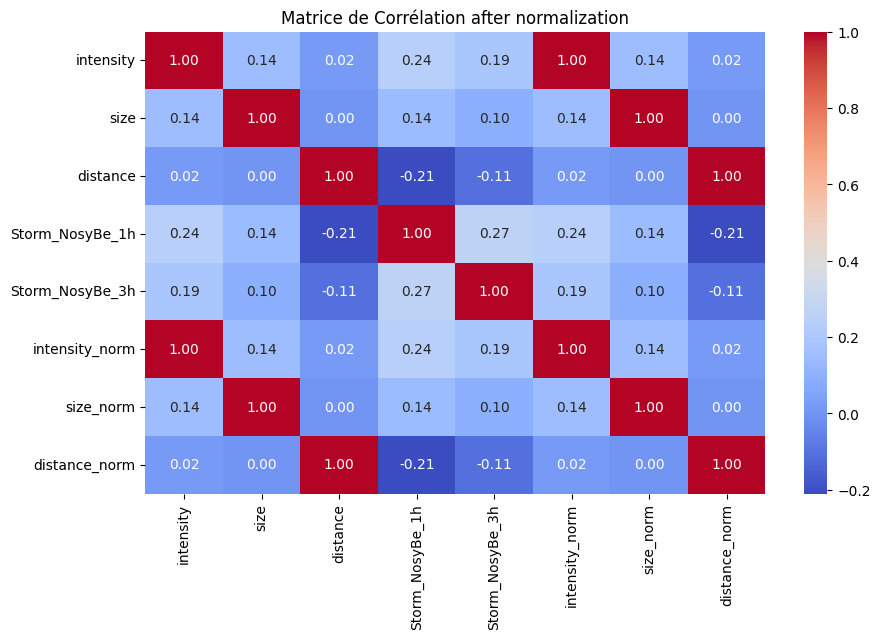

In [13]:
correlation_matrix = train_set.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation after normalization")
plt.show()




In [14]:
# feature engineering

train_set['intensity_size'] = train_set['intensity'] * train_set['size']
train_set['intensity_distance'] = train_set['intensity'] * train_set['distance']
train_set['size_distance'] = train_set['size'] * train_set['distance']

train_set['intensity_distance_ratio'] = train_set['intensity'] / train_set['distance']
train_set['size_distance_ratio'] = train_set['size'] / train_set['distance']






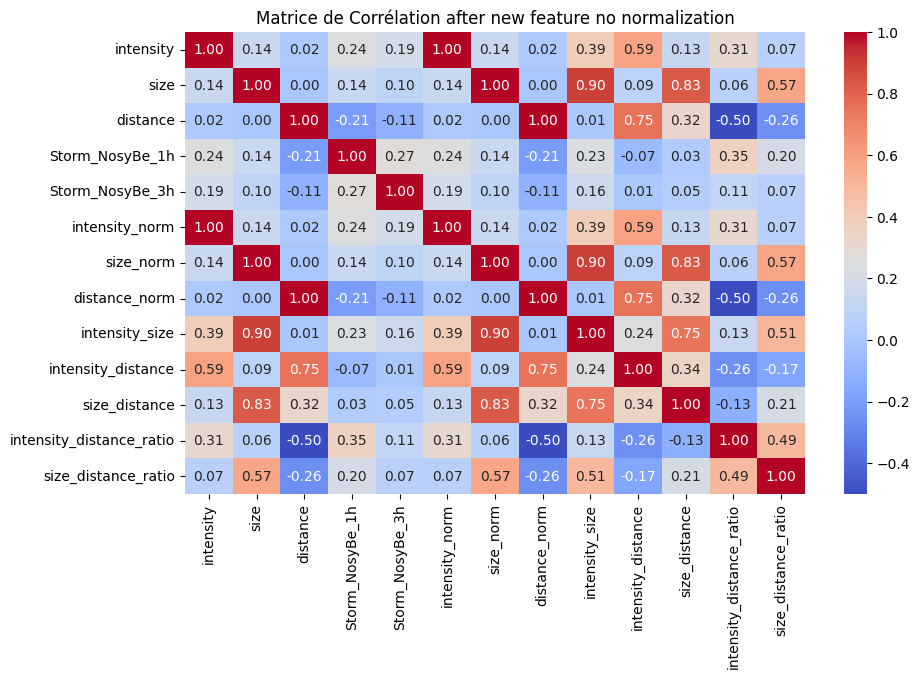

In [15]:
correlation_matrix = train_set.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation after new feature no normalization")
plt.show()




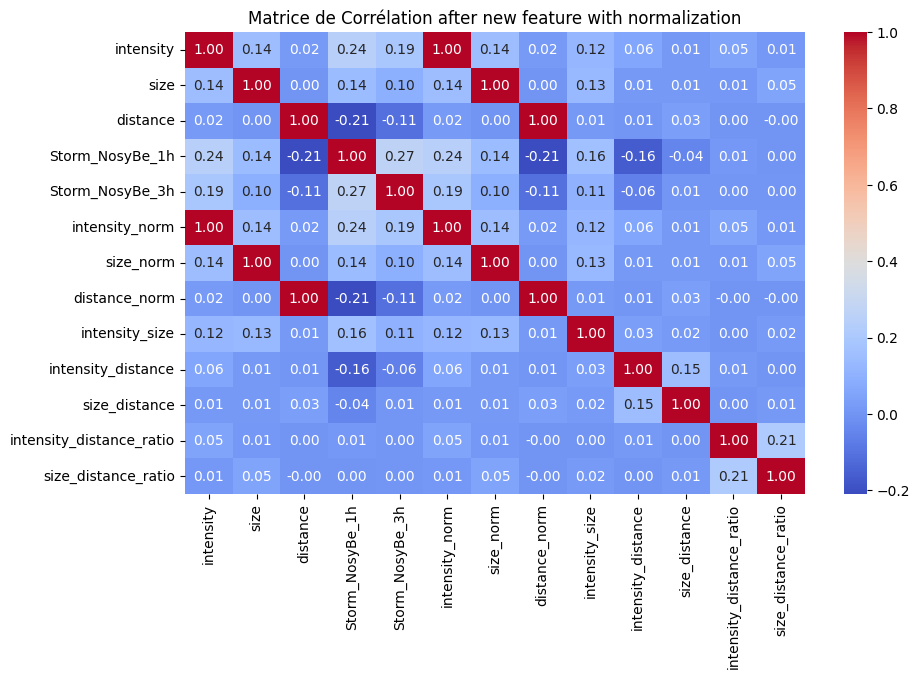

In [16]:
# variable déjà normaliser



train_set['intensity_size'] = train_set['intensity_norm'] * train_set['size_norm']
train_set['intensity_distance'] = train_set['intensity_norm'] * train_set['distance_norm']
train_set['size_distance'] = train_set['size_norm'] * train_set['distance_norm']

train_set['intensity_distance_ratio'] = train_set['intensity_norm'] / train_set['distance_norm']
train_set['size_distance_ratio'] = train_set['size_norm'] / train_set['distance_norm']


correlation_matrix = train_set.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation after new feature with normalization")
plt.show()




In [88]:
# conclusion :
# 1h - ajout : intensity_size (0,16) et intensity_distance (-0,16) 
# 3h - ajout : intensity_size (0,11) seulement 

# data_1h = train_set.drop(columns=["intensity_norm","size_norm","distance_norm","Storm_NosyBe_3h","intensity_distance_ratio","size_distance_ratio","size_distance"])
data_1h = train_set.drop(columns=["intensity","size","distance","Storm_NosyBe_3h","intensity_distance_ratio","size_distance_ratio","size_distance"])
data_3h = train_set.drop(columns=["intensity","size","distance","Storm_NosyBe_1h","intensity_distance_ratio","size_distance_ratio","size_distance"])
# data_3h = train_set.drop(columns=["intensity_norm","size_norm","distance_norm","Storm_NosyBe_1h","intensity_distance_ratio","size_distance_ratio","size_distance"])

print("data 1h columns : "+ str(data_1h.columns))
print("data 3h columns : "+ str(data_3h.columns))



data 1h columns : Index(['Storm_NosyBe_1h', 'intensity_norm', 'size_norm', 'distance_norm',
       'intensity_size', 'intensity_distance'],
      dtype='object')
data 3h columns : Index(['Storm_NosyBe_3h', 'intensity_norm', 'size_norm', 'distance_norm',
       'intensity_size', 'intensity_distance'],
      dtype='object')


In [89]:
from sklearn.model_selection import train_test_split

# pour 1h data split
# X_1h = data_1h[['intensity', 'size', 'distance', 'intensity_size','intensity_distance']]  
X_1h = data_1h[['intensity_norm', 'size_norm', 'distance_norm', 'intensity_size','intensity_distance']]  
y_1h = data_1h['Storm_NosyBe_1h']  

X_1h_train, X_1h_test, y_1h_train, y_1h_test = train_test_split(X_1h, y_1h, test_size=0.2, random_state=42)


# pour 3h data split 
# X_3h = data_3h[['intensity', 'size', 'distance', 'intensity_size',"intensity_distance"]]  
X_3h = data_3h[['intensity_norm', 'size_norm', 'distance_norm', 'intensity_size',"intensity_distance"]]  
y_3h = data_3h['Storm_NosyBe_3h']  

X_3h_train, X_3h_test, y_3h_train, y_3h_test = train_test_split(X_3h, y_3h, test_size=0.2, random_state=42)



In [90]:
from sklearn.ensemble import RandomForestClassifier #parfait pour variable numérique correlé faiblement
from sklearn.svm import SVC #basé sur la séparation optimale des classes 
from sklearn.linear_model import LogisticRegression # model linéair performant sur les variables moins correlé

# TEST 3 MODEL FOR 1h

# random_forest_1h = RandomForestClassifier(random_state=42, n_estimators=100,class_weight='balanced')
# random_forest_1h.fit(X_1h_train, y_1h_train)


# svm_1h = SVC(random_state=42, probability=True,class_weight='balanced')
# svm_1h.fit(X_1h_train, y_1h_train)


# logistic_regression_1h = LogisticRegression(
#     random_state=42, max_iter=1000,class_weight='balanced')
# logistic_regression_1h.fit(X_1h_train, y_1h_train)





In [91]:
# real models (after grid searchcv) 
# Logistique - après reglage.
# Meilleurs hyperparamètres : {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
# Meilleur score ROC-AUC : 0.8671126439324196

logistic_regression_1h = LogisticRegression(
C= 0.01, class_weight= 'balanced', penalty= 'l1', solver= 'liblinear',tol= 1e-05)
logistic_regression_1h.fit(X_1h_train, y_1h_train)

logistic_regression_3h = LogisticRegression(
C= 0.01, class_weight= 'balanced', penalty= 'l1', solver= 'liblinear',tol= 1e-05)
logistic_regression_3h.fit(X_3h_train, y_3h_train)





LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   solver='liblinear', tol=1e-05)

In [67]:
random_forest_3h = RandomForestClassifier(random_state=42, n_estimators=100,class_weight='balanced')
random_forest_3h.fit(X_3h_train, y_3h_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [92]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# # Modèles
# models = {
#     "Random Forest": random_forest_1h,
#     "SVM": svm_1h,
#     "Logistic Regression": logistic_regression_1h
# }


# # Entraînement des modèles et évaluation
# results = {}
# for model_name, model in models.items():
    
#     # Prédictions
#     y_pred = model.predict(X_1h_test)
#     y_prob = model.predict_proba(X_1h_test)[:, 1]  # Probabilité de tempête (classe 1)
    
#     # Calcul de la précision
#     accuracy = accuracy_score(y_1h_test, y_pred)
#     roc_auc = roc_auc_score(y_1h_test,y_prob)
    
#     # Pourcentage de tempêtes prédites
#     storm_percentage = (y_prob[y_1h_test == 1].sum() / len(y_1h_test[y_1h_test == 1])) * 100
        
#     # Sauvegarder les résultats
#     results[model_name] = {
#         "Accuracy": accuracy,
#         "Storm Percentage": storm_percentage,
#         "Roc Auc Score": roc_auc
#     }

# # Afficher les résultats
# for model_name, metrics in results.items():
#     print(f"{model_name}:")
#     print(f" - Accuracy: {metrics['Accuracy']:.2f}")
#     print(f" - Storm Percentage: {metrics['Storm Percentage']:.2f}%")
#     print(f" - ROC-AUC: {roc_auc:.2f}")
#     print("-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-")
    
# the best score
# Logistic Regression:
#  - Accuracy: 0.79
#  - Storm Percentage: 71.07%
#  - ROC-AUC: 0.87
# Random Forest:
#  - Accuracy: 0.94
#  - Storm Percentage: 30.82%
#  - ROC-AUC: 0.87

    

In [93]:
# Modèles
models = {
    "Logistic Regression 1h": logistic_regression_1h,
    "Logistic Regression 3h": logistic_regression_3h
}


    
# Prédictions
y_1h_pred = logistic_regression_1h.predict(X_1h_test)
y_3h_pred = logistic_regression_3h.predict(X_3h_test)

y_1h_prob = logistic_regression_1h.predict_proba(X_1h_test)[:, 1]  # Probabilité de tempête (classe 1)
y_3h_prob = logistic_regression_3h.predict_proba(X_3h_test)[:, 1]  # Probabilité de tempête (classe 1)

# Calcul de la précision
accuracy_1h = accuracy_score(y_1h_test, y_1h_pred)
accuracy_3h = accuracy_score(y_3h_test, y_3h_pred)

roc_auc_1h = roc_auc_score(y_1h_test,y_1h_prob)
roc_auc_3h = roc_auc_score(y_3h_test,y_3h_prob)

# Pourcentage de tempêtes prédites
storm_percentage_1h = (y_1h_prob[y_1h_test == 1].sum() / len(y_1h_test[y_1h_test == 1])) * 100
storm_percentage_3h = (y_3h_prob[y_3h_test == 1].sum() / len(y_3h_test[y_3h_test == 1])) * 100

print("-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-")
print("Logistic regression 1h :")
print(f" - Accuracy: {accuracy_1h:.2f}")
print(f" - ROC-AUC: {roc_auc_1h:.2f}")
print(f" - Storm Percentage: {storm_percentage_1h:.2f}%")
print("-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-")
print("Logistic regression 3h :")
print(f" - Accuracy: {accuracy_3h:.2f}")
print(f" - ROC-AUC: {roc_auc_3h:.2f}")
print(f" - Storm Percentage: {storm_percentage_3h:.2f}%")
print("-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-")

-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Logistic regression 1h :
 - Accuracy: 0.79
 - ROC-AUC: 0.87
 - Storm Percentage: 70.31%
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Logistic regression 3h :
 - Accuracy: 0.70
 - ROC-AUC: 0.76
 - Storm Percentage: 59.85%
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-


In [86]:
# Prédictions
y_3h_pred = random_forest_3h.predict(X_3h_test)

y_3h_prob = random_forest_3h.predict_proba(X_3h_test)[:, 1]  # Probabilité de tempête (classe 1)

# Calcul de la précision
accuracy_3h = accuracy_score(y_3h_test, y_3h_pred)

roc_auc_3h = roc_auc_score(y_3h_test,y_3h_prob)

# Pourcentage de tempêtes prédites
storm_percentage_3h = (y_3h_prob[y_3h_test == 1].sum() / len(y_3h_test[y_3h_test == 1])) * 100

print("-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-")
print("Random forest 3h :")
print(f" - Accuracy: {accuracy_3h:.2f}")
print(f" - ROC-AUC: {roc_auc_3h:.2f}")
print(f" - Storm Percentage: {storm_percentage_3h:.2f}%")


-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Random forest 3h :
 - Accuracy: 0.94
 - ROC-AUC: 0.71
 - Storm Percentage: 13.43%


In [73]:
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }


# grid_search = GridSearchCV(
#     SVC(random_state=42, probability=True,class_weight='balanced'),
#     param_grid,
#     cv=5,
#     scoring='roc_auc'
# )
# grid_search.fit(X_1h_train, y_1h_train)
# print("Logistique - après reglage.")
# print("Best parameters:", grid_search.best_params_)
# print("Meilleur score ROC-AUC :", grid_search.best_score_)
# print("_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-")



In [75]:
# from sklearn.model_selection import GridSearchCV
# # Hyperparamètres à tester
# param_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'C': [0.01, 0.1, 1, 10, 100],
#     'solver': ['liblinear', 'saga', 'lbfgs'],
#     'class_weight': [None, 'balanced']
# }
# result :
# Logistique - après reglage.
# Meilleurs hyperparamètres : {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
# Meilleur score ROC-AUC : 0.8671126439324196
# Logistique - après reglage.
# Meilleurs hyperparamètres : {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05}
# Meilleur score ROC-AUC : 0.8671891772087272



param_grid = {
    # 'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Ajoute 'none' pour voir l'impact sans régularisation
    'penalty': ['l1'],  # Ajoute 'none' pour voir l'impact sans régularisation
    # 'C': [0.01, 0.1, 1, 10, 100],
    'C': [0.01],
    # 'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],  # Ajoute 'newton-cg' (utile pour l2)
    'solver': ['liblinear'],  # Ajoute 'newton-cg' (utile pour l2)
    # 'class_weight': [None, 'balanced'],
    'class_weight': ['balanced'],
    # 'max_iter': [100, 200, 500],  # Teste différentes limites d'itération
    'max_iter': [100],  # Teste différentes limites d'itération
    # 'tol': [1e-4, 1e-5, 1e-6]
    'tol': [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
}


# # # Initialisation du modèle
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# # Recherche par grille
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_1h_train, y_1h_train)
print("Logistique - après reglage.")
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleur score ROC-AUC :", grid_search.best_score_)
print("_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-")



Logistique - après reglage.
Meilleurs hyperparamètres : {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05}
Meilleur score ROC-AUC : 0.8671891772087272
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-


In [94]:
# charger test_set, evaluation and create submission.svc
test_set = pd.read_csv("../data/test.csv")


# Normalize : intensity, size, distance 
test_set['intensity_norm'] = (test_set['intensity'] - test_set['intensity'].mean()) / test_set['intensity'].std()
test_set['size_norm'] = (test_set['size'] - test_set['size'].mean()) / test_set['size'].std()
test_set['distance_norm'] = (test_set['distance'] - test_set['distance'].mean()) / test_set['distance'].std()

test_set['intensity_size'] = test_set['intensity_norm'] * test_set['size_norm']
test_set['intensity_distance'] = test_set['intensity_norm'] * test_set['distance_norm']


X_1h_test = test_set.drop(columns=["storm_id", "year", "month", "day", "hour", "minute","lat","lon",
                                "intensity_norm","size_norm","distance_norm"])
X_3h_test = test_set.drop(columns=["storm_id", "year", "month", "day", "hour", "minute","lat","lon",
                                "intensity_norm","size_norm","distance_norm","intensity_distance"])

# Prédictions pour Storm_NosyBe_1h et Storm_NosyBe_3h
# prediction_forest_1h = random_forest_1h.predict_proba(X_test)[:, 1]  # Probabilité classe 1
prediction_logistic_1h = logistic_regression_1h.predict_proba(X_1h_test)[:, 1]  # Probabilité classe 1
prediction_logistic_3h = logistic_regression_3h.predict_proba(X_3h_test)[:, 1]  # Probabilité classe 1



submission_df = pd.DataFrame({
    'storm_id': test_set['storm_id'],               # Assure-toi que test_set contient 'storm_id'
    'Storm_NosyBe_1h': prediction_logistic_1h,
    'Storm_NosyBe_3h': prediction_logistic_3h
})

# Sauvegarde au format CSV
submission_file = "storm_predictions.csv"
submission_df.to_csv(submission_file, index=False)

print(f"Fichier de soumission créé : {submission_file}")




Fichier de soumission créé : storm_predictions3.csv
